# Tek Degiskenli Ayrikiri Gozlem Analizi

In [1]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df = df.select_dtypes(include = ['float64','int64'])
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df_table = df['table'].copy()

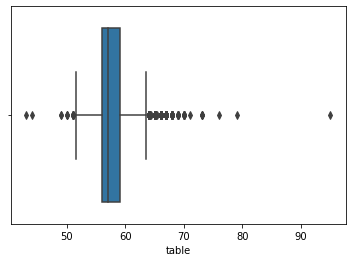

In [3]:
sns.boxplot(df_table);

In [4]:
q1 = df_table.quantile(0.25)
q3 = df_table.quantile(0.75)
iqr = q3-q1

alt_sinir = q1 - 1.5*iqr
alt_sinir

ust_sinir = q3 + 1.5*iqr
ust_sinir

63.5

In [5]:
((df_table < alt_sinir) | (df_table > ust_sinir))

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [6]:
df_table < alt_sinir

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [7]:
aykiri_tf = df_table < alt_sinir

In [8]:
aykiri_tf[0:10]

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: table, dtype: bool

In [9]:
aykirilar = df_table[aykiri_tf]
aykirilar.index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

# Aykiri Deger Probleminin Cozulmesi

In [10]:
import pandas as pd

In [11]:
df_table.head()
type(df_table)
df_table.shape

(53940,)

In [12]:
temiz_df_table = df_table[~((df_table < (alt_sinir)) | (df_table > (ust_sinir)))]
temiz_df_table.shape

(53335,)

In [13]:
###### Ortalama Ile Doldurmak

In [14]:
df_table = df['table'].copy()

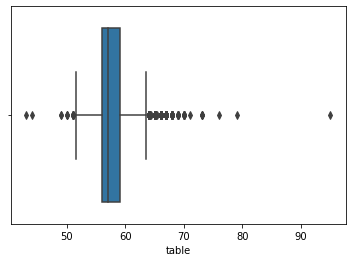

In [15]:
sns.boxplot(df_table)

In [16]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [17]:
df_table.mean()

57.45718390804598

In [18]:
df_table[aykiri_tf] = df_table.mean()

In [19]:
df_table[aykiri_tf]

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

In [20]:
aykiri_tf = (df_table < (alt_sinir)) | (df_table > (ust_sinir))

In [21]:
df_table[aykiri_tf].head()

2      65.0
91     69.0
145    64.0
219    64.0
227    67.0
Name: table, dtype: float64

In [22]:
df_table.describe()

count    53940.000000
mean        57.459505
std          2.230030
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [23]:
df_table[aykiri_tf] = df_table.mean()

In [24]:
df_table.describe()

count    53940.000000
mean        57.374369
std          2.062703
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
Name: table, dtype: float64

In [25]:
## Cok ugrasmak istemiyorsan aslinda bitti 24. satirda ayiklama islemi 

In [26]:
# 3. bir yontem olarak baskilama yontemi

In [27]:
df_table = df['table'].copy()

In [28]:
aykiri_tf = df_table < (alt_sinir)

In [29]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [30]:
df_table[aykiri_tf] = alt_sinir

In [31]:
df_table[aykiri_tf]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

# Cok Degiskenli Aykiri Gozlem

## Local Otlier Factor

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)
X_inliers =np.random.normal(70,3,(100,2))
X_inliers = np.r_[X_inliers +10, X_inliers -10]

print(X_inliers.shape)
print(X_inliers[:3,:2])

(200, 2)
[[81.49014246 79.5852071 ]
 [81.94306561 84.56908957]
 [79.29753988 79.29758913]]


In [33]:
X_outliers = np.random.uniform(low=15, high=130, size=(20, 2))

In [34]:
X_outliers

array([[115.89790327, 100.18839104],
       [ 95.15681021,  95.78566966],
       [ 56.34148239,  48.76306209],
       [108.07653288, 108.16304039],
       [114.71331664, 120.02266354],
       [ 73.80437587,  72.67437389],
       [106.80394558,  89.74585204],
       [ 95.72619088, 106.51615699],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 68.54377209,  77.40413299],
       [ 47.95224399,  82.94582497],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263],
       [ 77.17303899,  88.30443867]])

In [35]:
X = np.r_[X_inliers,X_outliers]
X[0:3,:]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913]])

In [36]:
LOF = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [37]:
LOF.fit_predict(X)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [38]:
X_score = LOF.negative_outlier_factor_

In [39]:
X_score[0:3]

array([-0.99920793, -1.14732911, -0.97212675])

In [40]:
X_score.mean()

-1.6850227435158005

In [41]:
X_score.std()

2.140119050235338

In [42]:
np.sort(X_score)[0:10]

array([-15.3785652 , -11.57669644, -10.75276599, -10.24101046,
       -10.07364152,  -9.64406264,  -9.34229978,  -9.26256027,
        -9.06812573,  -8.51275904])

<function matplotlib.pyplot.show(*args, **kw)>

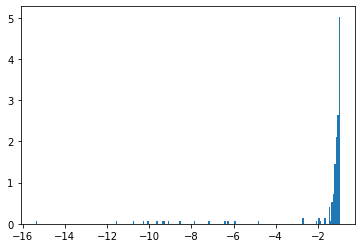

In [43]:
plt.hist(X_score, bins = "auto", density = True)
plt.show

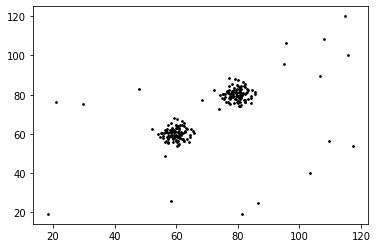

In [44]:
plt.scatter(X[:,0],X[:,1],color='k',s = 3, label = 'Gozlem Birimleri');

In [45]:
radius = radius = (X_score.max() - X_score) / (X_score.max() - X_score.min())

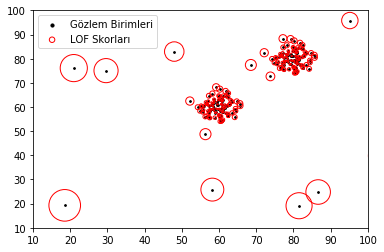

In [46]:
plt.scatter(X[:,0], X[:,1], color = "k", s = 3, label = "Gözlem Birimleri");

plt.scatter(X[:, 0], X[:, 1], s = 1000 * radius, edgecolors='r', 
            facecolors='none',label='LOF Skorları')

plt.xlim((10,100))
plt.ylim((10,100))

legend = plt.legend(loc = "upper left")

legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [30]

In [47]:
# aykiri gozlemlerin yakalanmasi

In [48]:
X[0:3]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913]])

In [49]:
np.sort(X_score)[0:9]

array([-15.3785652 , -11.57669644, -10.75276599, -10.24101046,
       -10.07364152,  -9.64406264,  -9.34229978,  -9.26256027,
        -9.06812573])

In [50]:
esik_deger =  np.sort(X_score)[9]
esik_deger

-8.512759037993277

In [51]:
(X_score > esik_deger)[200:220]

array([ True,  True,  True,  True, False,  True,  True,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False,  True])

In [52]:
tf_vektor = (X_score > esik_deger)

In [53]:
X[(X_score > esik_deger)]

array([[ 81.49014246,  79.5852071 ],
       [ 81.94306561,  84.56908957],
       [ 79.29753988,  79.29758913],
       [ 84.73763845,  82.30230419],
       [ 78.59157684,  81.62768013],
       [ 78.60974692,  78.60281074],
       [ 80.72588681,  74.26015927],
       [ 74.8252465 ,  78.31313741],
       [ 76.96150664,  80.942742  ],
       [ 77.27592777,  75.7630889 ],
       [ 84.39694631,  79.3226711 ],
       [ 80.20258461,  75.72575544],
       [ 78.36685183,  80.33276777],
       [ 76.54701927,  81.12709406],
       [ 78.19808393,  79.12491875],
       [ 78.19488016,  85.55683455],
       [ 79.95950833,  76.82686721],
       [ 82.46763474,  76.33746905],
       [ 80.62659079,  74.12098963],
       [ 76.01544185,  80.59058371],
       [ 82.21539974,  80.51410484],
       [ 79.65305515,  79.09668891],
       [ 75.56443403,  77.84046737],
       [ 78.61808369,  83.17136668],
       [ 81.03085487,  74.71087953],
       [ 80.97225191,  78.84475316],
       [ 77.969234  ,  81.83502887],
 

In [54]:
X[~tf_vektor] # aykiri gozlemler icin

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [55]:
X[(X_score < esik_deger)] # aykiri gozlemler icin diger yol

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

# Aykiri Gozlem Problemini Cozmek

In [56]:
df = X[X_score > esik_deger]

In [57]:
df[0:10]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913],
       [84.73763845, 82.30230419],
       [78.59157684, 81.62768013],
       [78.60974692, 78.60281074],
       [80.72588681, 74.26015927],
       [74.8252465 , 78.31313741],
       [76.96150664, 80.942742  ],
       [77.27592777, 75.7630889 ]])

In [58]:
df_X = X.copy()

In [59]:
np.mean(df_X[0])
np.mean(df_X[1])

83.25607759176307

In [60]:
df_X[~tf_vektor]

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [61]:
aykirilar = df_X[~tf_vektor]

In [62]:
aykirilar[:,:1]

array([[114.71331664],
       [117.35061431],
       [ 58.19203955],
       [ 81.50221621],
       [ 18.50752874],
       [109.59906448],
       [ 29.61195895],
       [103.54925861],
       [ 86.63240472],
       [ 20.94339793]])

In [63]:
aykirilar[:,:1] = np.mean(df_X[0])

In [64]:
aykirilar[:,1:2] = np.mean(df_X[1])

In [65]:
aykirilar

array([[80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759]])

In [66]:
df_X[~tf_vektor]= aykirilar

In [67]:
df_X[~tf_vektor]

array([[80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759]])

In [68]:
df_X[X_score == esik_deger]

array([[80.53767478, 83.25607759]])

In [69]:
df_X[~tf_vektor] = df_X[X_score == esik_deger]

In [70]:
df_X[~tf_vektor]

array([[80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759]])

# Eksik Veri Hizli Cozum

In [71]:
import numpy as np
import pandas as pd

V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [72]:
#import pandas_profiling as pp
#pp.ProfileReport(df) # bu benim ekstra baktigim yontem 

In [73]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [74]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [75]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [76]:
dff = df.dropna()

In [77]:
dff.isnull().sum()

V1    0
V2    0
V3    0
dtype: int64

In [78]:
df['V1'].mean()

6.0

In [79]:
df['V1'].fillna(df['V1'].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [80]:
dff['V1'].fillna(0)

2     6.0
4     7.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [81]:
df.apply(lambda x : x.fillna(x.mean()),axis = 0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


## Eksik veriyi saptamak

In [82]:
import numpy as np
import pandas as pd

V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [83]:
df.shape

(9, 3)

In [84]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,7.0,6.000000,5.000000,1.0,2.0,6.0,8.00,15.0
V2,6.0,6.166667,3.656045,2.0,3.5,6.0,7.75,12.0
V3,7.0,11.000000,9.729680,2.0,5.5,7.0,13.00,31.0


In [85]:
df.dtypes

V1    float64
V2    float64
V3    float64
dtype: object

In [86]:
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

In [87]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [88]:
df.isnull().sum().sum()

7

In [89]:
df.isnull()

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [90]:
df[df.isnull().any(axis =1 )]

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [91]:
df[df.notnull().all(axis =1 )]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [92]:
df[df["V1"].notnull() & df["V2"].notnull() & df["V3"].notnull()]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


# Gorsellestirme

In [93]:
!pip install missingno

In [94]:
import missingno as msno

In [95]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


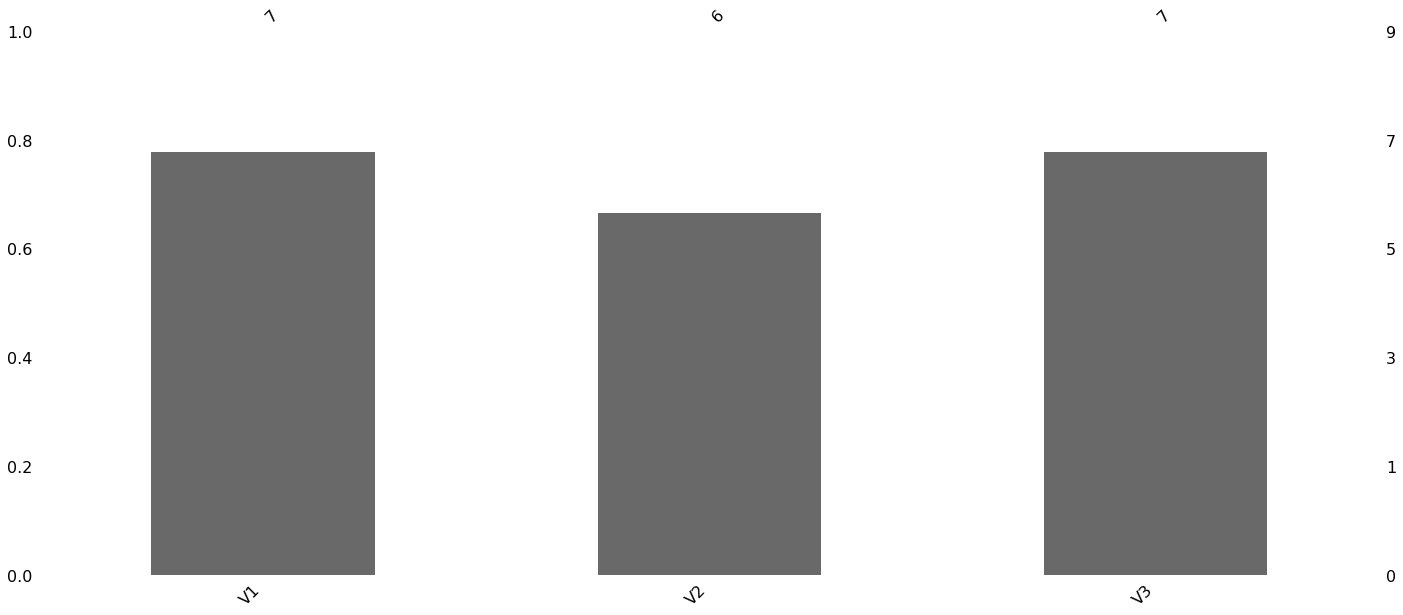

In [96]:
msno.bar(df);

In [97]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


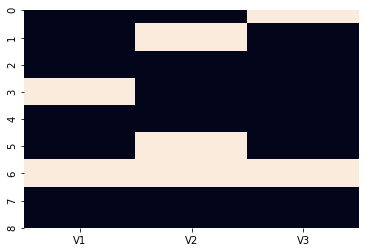

In [98]:
import seaborn as sns
sns.heatmap(df.isnull(),cbar = False);

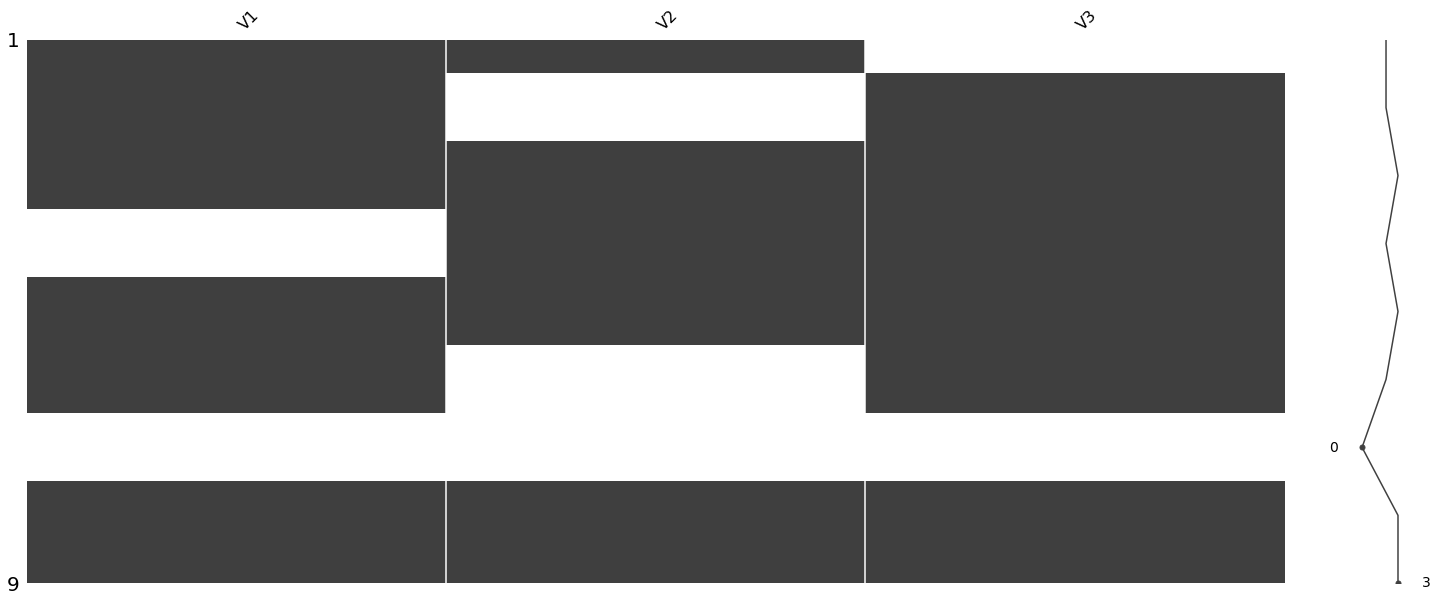

In [99]:
msno.matrix(df)

In [100]:
import seaborn as sns
df = sns.load_dataset('planets').copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


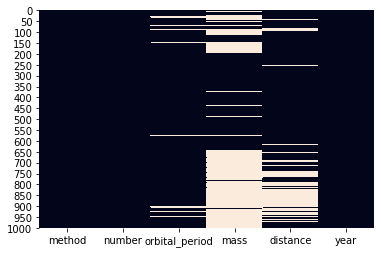

In [101]:
sns.heatmap(df.isnull(),cbar = False)

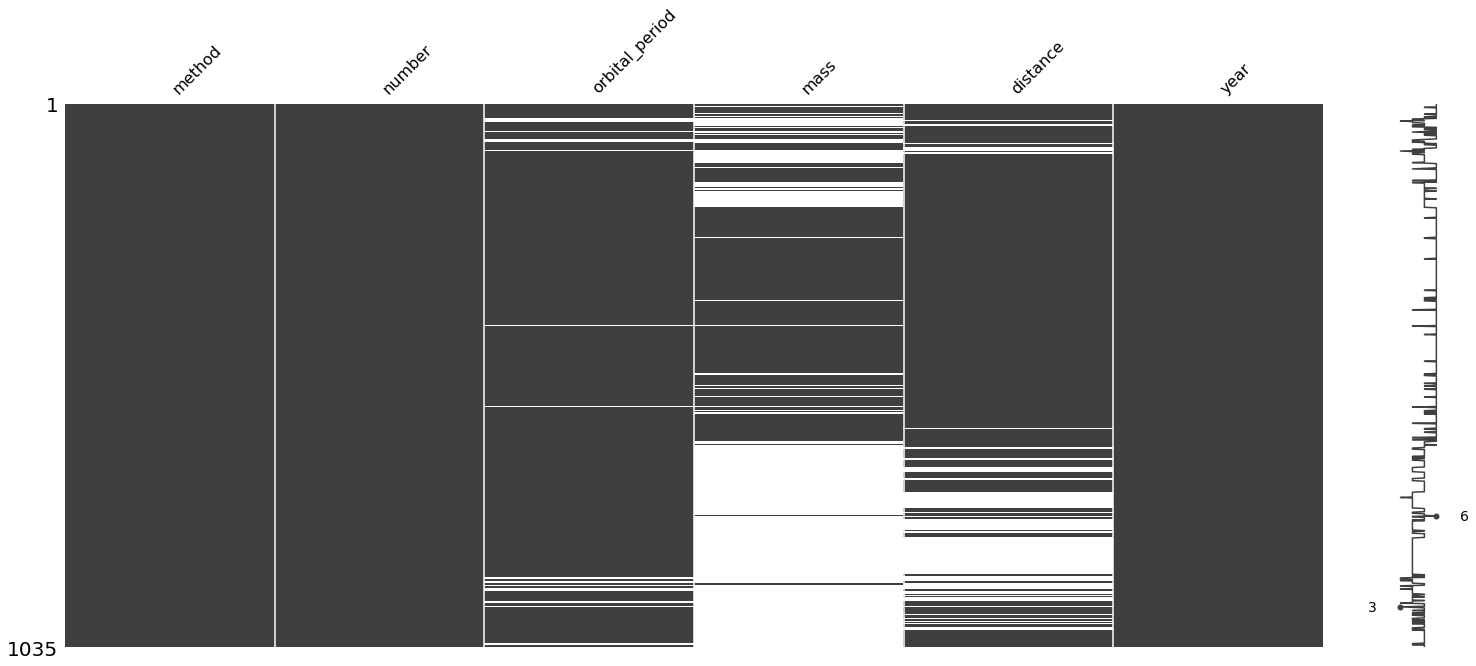

In [102]:
msno.matrix(df);

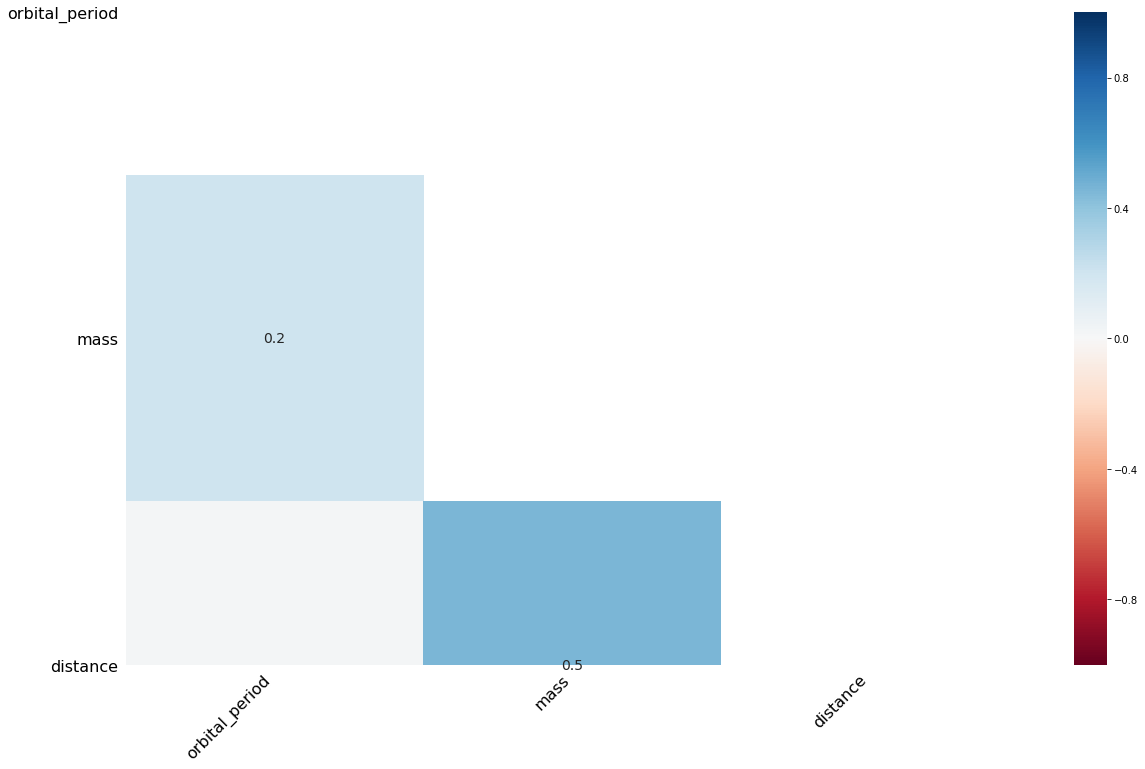

In [103]:
msno.heatmap(df)

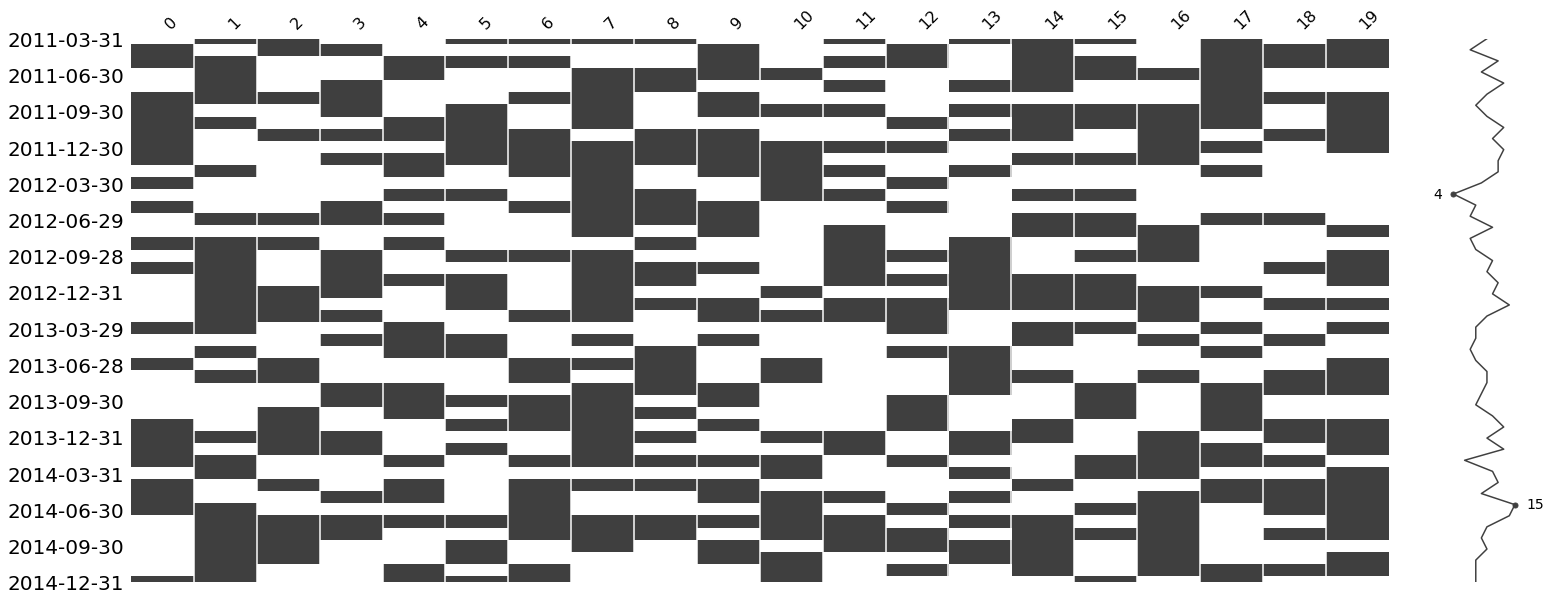

In [104]:
null_pattern = (np.random.random(1000).reshape((50, 20)) > 0.5).astype(bool)

null_pattern = pd.DataFrame(null_pattern).replace({False: None})

msno.matrix(null_pattern.set_index(pd.period_range('1/1/2011', '2/1/2015', freq='M')) , freq='BQ');

## Silme Yöntemleri

In [105]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [106]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [107]:
df.dropna(how = "all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [108]:
df.dropna(axis = 1)

""
0
1
2
3
4
5
6
7
8


In [109]:
df["V1"][[3,6]] = 99

In [110]:
df.dropna(axis = 1)

,V1
0,1.0
1,3.0
2,6.0
3,99.0
4,7.0
5,1.0
6,99.0
7,9.0
8,15.0


In [111]:
df.dropna(axis = 1, how = "all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,99.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,99.0,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [112]:
df["sil_beni"] = np.nan

In [113]:
df

,V1,V2,V3,sil_beni
0,1.0,7.0,NaN,NaN
1,3.0,NaN,12.0,NaN
2,6.0,5.0,5.0,NaN
3,99.0,8.0,6.0,NaN
4,7.0,12.0,14.0,NaN
5,1.0,NaN,7.0,NaN
6,99.0,NaN,NaN,NaN
7,9.0,2.0,2.0,NaN
8,15.0,3.0,31.0,NaN


In [114]:
df.dropna(axis = 1, how = "all", inplace = True)

In [115]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,99.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,99.0,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


## Basit Değer Atama Yöntemleri

In [116]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [117]:
df["V1"].fillna(0)

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [118]:
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [119]:
df.apply(lambda x: x.fillna(x.mean()), axis = 0 ) # her doguskan kendi ortalamalari ile doldurma

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [120]:
df.fillna(df.mean()[:]) # her degisken kendi ortalamasiyla 

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [121]:
df.fillna(df.mean()["V1":"V2"])
df.fillna(df.median()["V3"])

,V1,V2,V3
0,1.0,7.0,7.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,7.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,7.0,7.0
6,7.0,7.0,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [122]:
df.where(pd.notna(df), df.mean(), axis = "columns")

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [123]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [124]:
df.groupby("departman")["maas"].mean()

departman
IK    4.666667
IT    7.000000
Name: maas, dtype: float64

In [125]:
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maas, dtype: float64

## Kategorik Değişkenlerde Değer Atama

In [126]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT",np.NaN,"IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,nan
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [127]:
df.isnull()

,maas,V2,V3,departman
0,False,False,True,False
1,False,True,False,False
2,False,False,False,False
3,True,False,False,False
4,False,False,False,False
5,False,True,False,False
6,True,True,True,False
7,False,False,False,False
8,False,False,False,False


In [128]:
df.groupby("departman")["departman"].count()

departman
IK     5
IT     3
nan    1
Name: departman, dtype: int64

In [129]:
df.departman.loc[df.departman == "nan"] = "IK"

C:\Users\Surface\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [130]:
df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IK
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [131]:
df.departman[0] = df.V3[0]

C:\Users\Surface\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [132]:
df

,maas,V2,V3,departman
0,1.0,7.0,NaN,NaN
1,3.0,NaN,12.0,IK
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [133]:
df.groupby("departman")["departman"].count()

departman
IK    6
IT    2
Name: departman, dtype: int64

In [134]:
df.departman.fillna(df["departman"].mode())

0    IK
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

## ZamanSerilerinde Atama İşlemleri

In [135]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [136]:
df["maas"].interpolate()

0     1.0
1     3.0
2     6.0
3     6.5
4     7.0
5     1.0
6     5.0
7     9.0
8    15.0
Name: maas, dtype: float64

In [137]:
df["maas"].fillna(method = "bfill")

0     1.0
1     3.0
2     6.0
3     7.0
4     7.0
5     1.0
6     9.0
7     9.0
8    15.0
Name: maas, dtype: float64

In [138]:
df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [139]:
df.fillna(method = 'bfill')

,maas,V2,V3,departman
0,1.0,7.0,12.0,IT
1,3.0,5.0,12.0,IT
2,6.0,5.0,5.0,IK
3,7.0,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,2.0,7.0,IK
6,9.0,2.0,2.0,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


## Tahmine Dayalı Değer Atama Yöntemleri

number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64


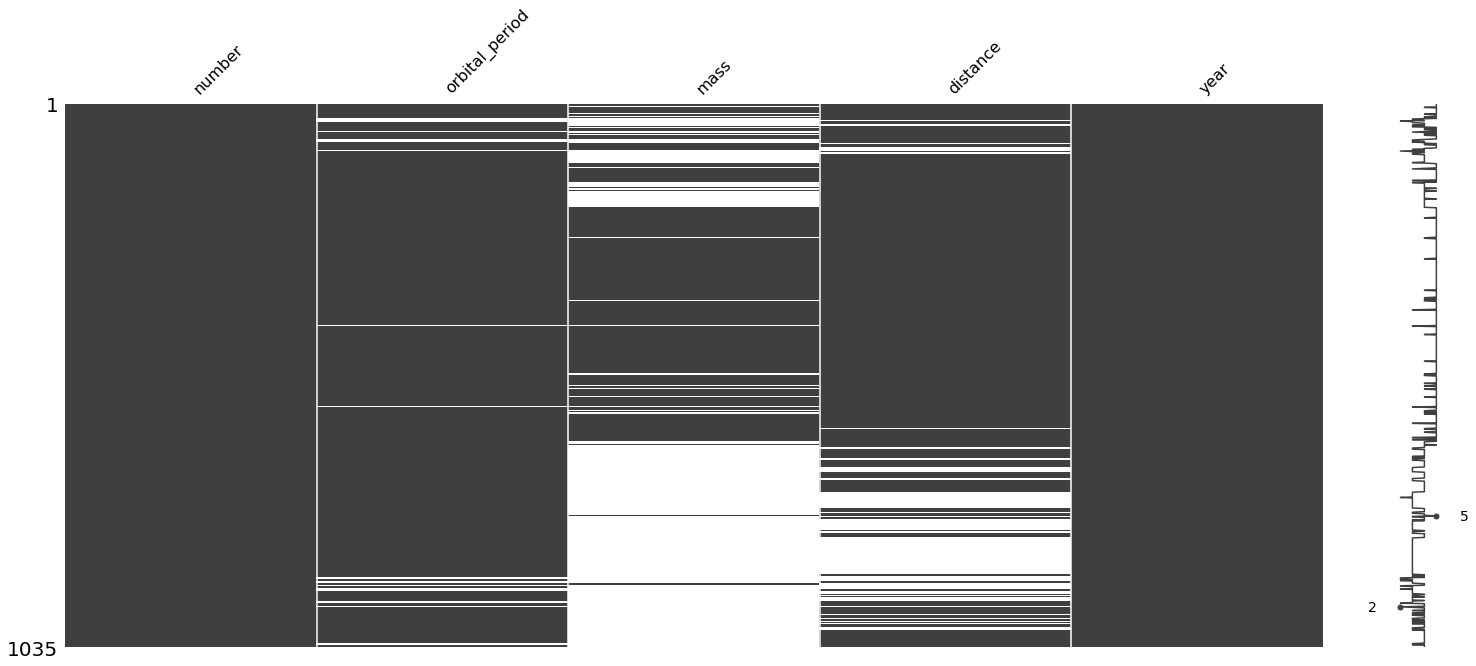

In [140]:
import seaborn as sns
df = sns.load_dataset('planets').copy()
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.isnull().sum())
msno.matrix(df);

#  Veri Standardizasyonu & Değişken Dönüşümü

## Standartlaştırma

In [141]:
import numpy as np
import pandas as pd

V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)



df = df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [143]:
from sklearn import preprocessing

In [144]:
preprocessing.scale(df) # ortalama 0 standar sapma 1 olacak sekilde standartlastirma

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

In [145]:
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


## Normalizasyon

In [146]:
preprocessing.normalize(df) # 0 ile 1 arasinda hale getrirdik

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

## Min-max Donusumu

In [147]:
scaler = preprocessing.MinMaxScaler(feature_range = (10,20))

In [148]:
scaler.fit_transform(df)

array([[10.        , 12.85714286, 11.11111111],
       [13.33333333, 12.85714286, 17.77777778],
       [18.33333333, 10.        , 10.        ],
       [16.66666667, 14.28571429, 11.11111111],
       [20.        , 20.        , 20.        ]])

## Binarize Dönüşüm

In [149]:
binarizer = preprocessing.Binarizer(threshold = 5).fit(df) # belli bir esik degere gore 0-1 e donusturu

In [150]:
binarizer.transform(df)

array([[0., 1., 1.],
       [0., 1., 1.],
       [1., 0., 0.],
       [0., 1., 1.],
       [1., 1., 1.]])

## 0-1 Dönüşümü

In [151]:
import seaborn as sns
tips = sns.load_dataset('tips')
df = tips.copy()
df_l = df.copy()

In [152]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [153]:
df_l["yeni_sex"] = df_l["sex"].cat.codes # erkek= kadini 1-0 a donusturduk

In [154]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,1


In [155]:
lbe = preprocessing.LabelEncoder() # yukaridakonin sklearn ile yapimi

In [156]:
df_l["daha_yeni_sex"] = lbe.fit_transform(df_l["sex"])

In [157]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,daha_yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0


## "1 ve Diğerleri (0) " Dönüşümü

In [158]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [159]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,daha_yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0


In [160]:
df_l["yen_gun"] = np.where(df_l["day"].str.contains("Sun"),1,0)

In [161]:
df_l.head(20)

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,daha_yeni_sex,yen_gun
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0,1
5,25.29,4.71,Male,No,Sun,Dinner,4,0,1,1
6,8.77,2.00,Male,No,Sun,Dinner,2,0,1,1
7,26.88,3.12,Male,No,Sun,Dinner,4,0,1,1
8,15.04,1.96,Male,No,Sun,Dinner,2,0,1,1
9,14.78,3.23,Male,No,Sun,Dinner,2,0,1,1


## Çok Sınıflı Dönüşüm

In [162]:
lbe = preprocessing.LabelEncoder()

In [163]:
df_l["daha_yeni_gun"] = lbe.fit_transform(df_l["day"])

In [164]:
df_l

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,daha_yeni_sex,yen_gun,daha_yeni_gun
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0,1,2
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1,1,2
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1,1,2
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1,1,2
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0,1,0,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1,0,0,1
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0,1,0,1
242,17.82,1.75,Male,No,Sat,Dinner,2,0,1,0,1


## One-Hot Dönüşümü ve Dummy Değişken Tuzayı

In [165]:
df_one_hot = df.copy()

In [166]:
pd.get_dummies(df_one_hot, columns = ["sex"], prefix = ["sex"]).head()

,total_bill,tip,smoker,day,time,size,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1


In [167]:
pd.get_dummies(df_one_hot, columns = ["day"], prefix = ["day"]).head()

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,0,0,1


## Sürekli Değişkeni Kategorik Değişkene Çevirme

In [168]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [169]:
dff = df.select_dtypes(include = ["float64", "int64"])

In [170]:
est = preprocessing.KBinsDiscretizer(n_bins = [3,2,2], encode = "ordinal", strategy = "quantile").fit(dff)

In [171]:
est.transform(dff)[0:10]

array([[1., 0., 1.],
       [0., 0., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [0., 0., 1.],
       [2., 1., 1.],
       [1., 0., 1.],
       [0., 1., 1.]])

## Değişkeni İndexe, İndexi Değişkene Çevirmek

In [172]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [173]:
df["yeni_degisken"]  = df.index

In [174]:
df["yeni_degisken"] = df["yeni_degisken"] + 10

In [175]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_degisken
0,16.99,1.01,Female,No,Sun,Dinner,2,10
1,10.34,1.66,Male,No,Sun,Dinner,3,11
2,21.01,3.50,Male,No,Sun,Dinner,3,12
3,23.68,3.31,Male,No,Sun,Dinner,2,13
4,24.59,3.61,Female,No,Sun,Dinner,4,14


In [176]:
df.index = df["yeni_degisken"]

In [177]:
df.index

Int64Index([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
            ...
            244, 245, 246, 247, 248, 249, 250, 251, 252, 253],
           dtype='int64', name='yeni_degisken', length=244)